In [1]:
import pandas as pd

In [2]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.set_theme()

In [10]:
df = pd.read_csv('cases_airport_jp_cleaned.csv', index_col='id')
df

,case_id,airport,date,age,gender,residence,history,symptom,year,week,month
id,,,,,,,,,,,
1230,1958,羽田,2020-11-12,20代,男性,東京都,アメリカ合衆国,鼻汁,2020,46,11
1178,2006,羽田,2020-12-29,40代,男性,宮城県,イギリス,無症状,2020,53,12
1287,1886,成田,2020-12-31,50代,女性,大阪府,フィリピン,無症状,2020,53,12
1288,1887,成田,2020-12-31,40代,男性,長野県,アメリカ合衆国,無症状,2020,53,12
1289,1888,成田,2020-12-31,20代,男性,非公表,アメリカ合衆国,無症状,2020,53,12
...,...,...,...,...,...,...,...,...,...,...,...
156,3160,成田,2021-07-08,30代,男性,埼玉県,ミャンマー,無症状,2021,27,7
180,3159,成田,2021-07-08,40代,男性,神奈川県,インドネシア,無症状,2021,27,7
179,3158,羽田,2021-07-08,30代,男性,非公表,インドネシア,無症状,2021,27,7


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1294 entries, 1230 to 173
Data columns (total 9 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   case_id    1294 non-null   int64 
 1   airport    1294 non-null   object
 2   date       1294 non-null   object
 3   age        1294 non-null   object
 4   gender     1294 non-null   object
 5   residence  1294 non-null   object
 6   history    1294 non-null   object
 7   symptom    1294 non-null   object
 8   year       1294 non-null   int64 
dtypes: int64(2), object(7)
memory usage: 101.1+ KB


## Positive cases per month / week / day

In [5]:
# Add week and month columns
df['date'] = pd.to_datetime(df['date'])

# week 53 will be assigned to a couple of days of the beginning 2021
df['week'] = df['date'].dt.isocalendar().week

df['month'] = df['date'].dt.month

In [64]:
# filt = (df_2021['week'] > 50)|(df_2021['week'] == 1)
# df_2021.loc[filt]

### Per week

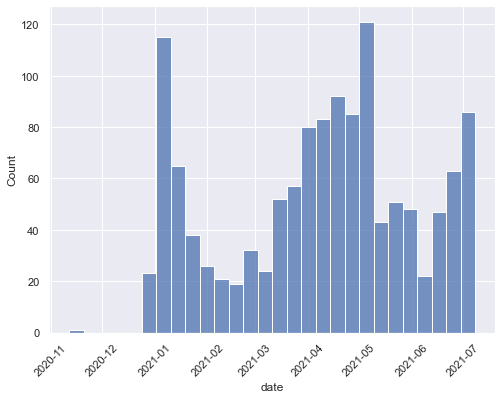

In [36]:
# count per week
# pos_per_week = df_2021['week'].value_counts()
# # sns.lineplot(x=pos_per_week.index, y=pos_per_week)
# sns.histplot(df_2021.week)

plt.figure(figsize=(8, 6))
sns.histplot(df.date, bins=28)
plt.xticks(rotation=45)
plt.show()

## Per month

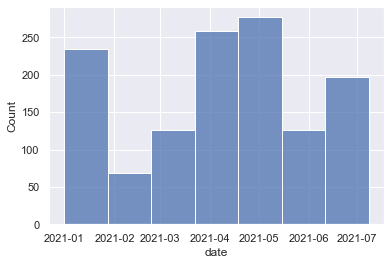

In [33]:
# per_month
# pos_per_month = df_2021['month'].value_counts()
# sns.lineplot(x=pos_per_month.index, y=pos_per_month)

plt.figure(figsize=(6, 4))
sns.histplot(df_2021.date, bins=7)
plt.show()

## Per day

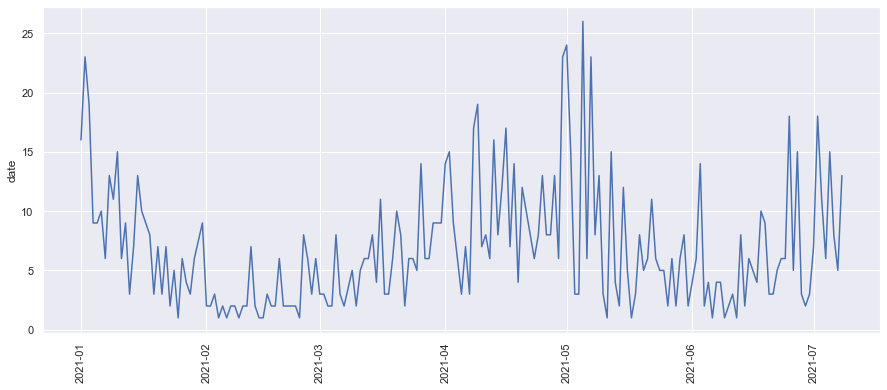

In [61]:
pos_per_date = df_2021['date'].value_counts().sort_index()

plt.figure(figsize=(15, 6))
sns.lineplot(x=pos_per_date.index, y=pos_per_date)
plt.xticks(rotation=90)
plt.show()

## Which country did they visit?

In [69]:
df.value_counts('history')

history
インド                   208
パキスタン                 152
アメリカ合衆国               142
フィリピン                 119
ネパール                   99
                     ... 
バングラディッシュ               1
キューバ                    1
ガーナ、エチオピア、韓国            1
パキスタン、ケニア、アラブ首長国連邦      1
-                       1
Length: 105, dtype: int64

In [128]:
# 大韓民国　→　韓国　
filt = df['history'] == '大韓民国'
df.loc[filt, 'history'] = '韓国'

df.loc[df['history'] == '韓国']

,case_id,airport,date,age,gender,residence,history,symptom,year,week,month
id,,,,,,,,,,,
890,2286,成田,2021-03-17,60代,女性,東京都,韓国,無症状,2021,11,3
830,2346,中部,2021-03-27,40代,女性,愛知県,韓国,無症状,2021,12,3
580,2598,成田,2021-04-21,40代,女性,東京都,韓国,無症状,2021,16,4
475,2696,成田,2021-05-01,30代,女性,千葉県,韓国,無症状,2021,17,5
91,2987,成田,2021-06-15,50代,男性,千葉県,韓国,無症状,2021,24,6


In [73]:
# Label the following case as unknown 
filt = (df['history'] == '-')|(df['history'] == '―')|(df['history'] == '－')
df.loc[filt, 'history'] = 'unknown'

In [74]:
df.loc[filt]

,case_id,airport,date,age,gender,residence,history,symptom,year,week,month
id,,,,,,,,,,,
599,2568,羽田,2021-04-18,40代,男性,非公表,unknown,発熱、呼吸苦,2021,15,4
598,2567,羽田,2021-04-18,40代,男性,非公表,unknown,呼吸苦,2021,15,4
600,2569,羽田,2021-04-18,20代,男性,非公表,unknown,発熱、呼吸苦,2021,15,4
453,2729,福岡,2021-05-02,30代,男性,非公表,unknown,発熱,2021,17,5
454,2730,福岡,2021-05-02,20代,男性,非公表,unknown,発熱、咳嗽,2021,17,5
455,2731,福岡,2021-05-02,40代,男性,非公表,unknown,発熱、倦怠感,2021,17,5
50,3038,仙台,2021-06-23,30代,男性,非公表,unknown,発熱、咳嗽,2021,25,6


In [129]:
history = df['history'].value_counts()


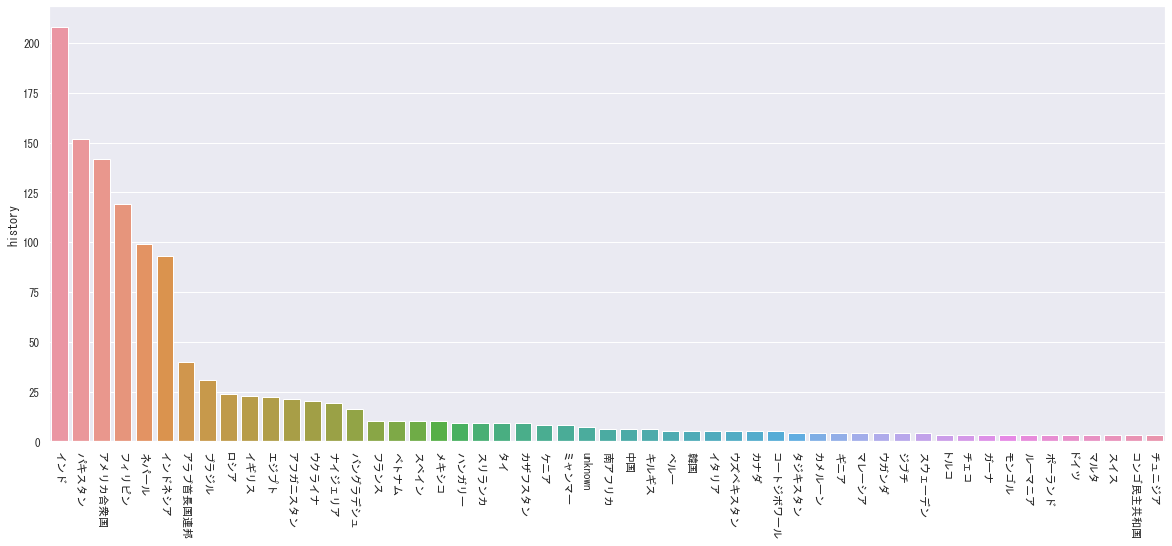

In [130]:
# history occuring more than twice
filt = history.values > 2
# history[:50]

history = history.loc[filt]

plt.figure(figsize=(20, 8))
sns.set_theme(font="MS Gothic")
sns.barplot(x=history.index, y=history)
plt.xticks(rotation=-90)
plt.show()

In [101]:
history_grp = df.groupby(['history'])

In [104]:
history_grp.get_group('インド')

,case_id,airport,date,age,gender,residence,history,symptom,year,week,month
id,,,,,,,,,,,
1220,1966,関空,2021-01-05,10代,男性,兵庫県,インド,無症状,2021,1,1
1228,1956,成田,2021-01-05,30代,男性,東京都,インド,無症状,2021,1,1
1173,2001,関空,2021-01-09,10代未満,男性,広島県,インド,無症状,2021,1,1
1174,2002,関空,2021-01-09,20代,男性,大阪府,インド,無症状,2021,1,1
1157,2028,成田,2021-01-12,20代,男性,群馬県,インド,無症状,2021,2,1
...,...,...,...,...,...,...,...,...,...,...,...
111,2974,羽田,2021-06-08,50代,男性,非公表,インド,無症状,2021,23,6
84,2996,成田,2021-06-13,50代,男性,東京都,インド,無症状,2021,23,6
29,3044,羽田,2021-06-19,20代,男性,大阪府,インド,無症状,2021,24,6


In [106]:
# Case of passenger who visited Netherlands
filt = df['history'].str.contains('オランダ', na=False)
df.loc[filt]

,case_id,airport,date,age,gender,residence,history,symptom,year,week,month
id,,,,,,,,,,,
916,2267,成田,2021-03-15,50代,女性,宮城県,オランダ、ウクライナ,無症状,2021,11,3


In [135]:
# history_grp.groups
country = history_grp.groups.keys()
total_pos_cases = [len(val) for val in history_grp.groups.values()]
# history_grp.groups.values()

In [145]:
df['gender'].value_counts()

男性    948
女性    346
Name: gender, dtype: int64